In [1]:
from IPython.display import Image

# Selenium ile veri toplama: Seçim verileri

İnternette pek çok veri var; ama bu verilerin hepsine aynı kolaylıkla ulaşılamıyor. Bazı web hizmetleri bir API aracılığıyla kolay bir erişim ara yüzü sunuyorlar. Ancak bazılarında, verinin bütününe erişmek için uzun süren zahmetli işlemler, ardarda menü seçimleri, bitmek bilmez tıklamalar gerekiyor. Bu yazının konusu, tarayıcıda elle yaptığımızda çok zahmetli, ama rutin olan işlemleri otomatikleştirmemizi sağlayan Selenium paketi. Bu paketi kullanarak Yüksek Seçim Kurulu'nun Sandık Sonuçları Paylaşım Sistemi'ne bağlanacağız ve 24 Haziran 2018 seçimlerinin bütün sonuçlarını bilgisayarımıza nasıl kaydedeceğimizi göreceğiz.

Bu uzun rehberde bu programı adım adım oluşturacağız. Bunun yerine doğrudan sonuca gitmek istiyorsanız, programın tam halini GitHub depomuzda <LİNK VER> bulabilirsiniz.

## Selenium hakkında

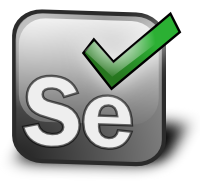

In [2]:
Image("img/selenium-logo.png")

Selenium (tam adıyla Selenium Webdriver), web sitelerinin otomatik olarak test edilmesi için hazırlanmış bir yazılım paketi. Java, JavaScript, C#, Python, Ruby, PHP ve Perl ile beraber kullanılması mümkün. Bu yazıda Python için hazırlanmış arayüzünü kullanacağız.

Selenium bir çok marifeti olan büyük bir paket. Burada her özelliğini ayrıntılı olarak anlatmayacağız. İlgili sayfalardaki belgelerden ayrıntılı bilgi alabilir, örnekleri inceleyebilirsiniz. Buradaki örneğimizden sonra kendi istediğiniz başka bir siteye erişimi otomatize ederek bilginizi genişletebilirsiniz. tarayıcıda elle yaptığınız her işlemi (form doldurma, menü seçimi yapma, bağlantıya tıklama, dosya indirme,...) Selenium'la otomatik olarak yapabilirsiniz.

Bununla beraber, bütün sitelerin otomatik erişime sıcak bakmadığını aklınızda tutun. Sitelerin kullanım şartları içinde "robotlara" izin verilip verilmediğine dair bilgi mevcuttur. Site sahibinin izin vermediği bir şeyi yapmamaya çalışın, yoksa IP adresinizin engellenmesi mümkündür. Dahası, çok hızlı ve sık olarak komut göndermeyin. Bu, özellikle küçük web sunucularının tıkanmasına, başka kullanıcılara hizmet verememesine sebep olabilir. Sizden bir DOS saldırısı geldiği izlenimi edinilirse erişiminizin engellenmesi söz konusu olabilir.

## YSK'dan veri alma

Bu yazıda YSK'nın sandık sonuçları sorgulama sayfasına erişimi otomatikleştireceğiz. Bu tür bir otomasyon sayfanın içindeki ayrıntılı bilgilere bağlı olacaktır ister istemez. Nereye tıklayacağımızı, neyi seçeceğimizi önceden biliyor olmalıyız. Bu yüzden, önce bu sorgulamayı elle yapalım.

Adımlar şöyle:

1 - Tarayıcımızı açalım ve `https://sonuc.ysk.gov.tr` adresine yönlendirelim.

2 - "CUMHURBAŞKANI VE 27.DÖNEM MİLLETVEKİLİ GENEL SEÇİMİ" yanındaki radyo düğmesini seçelim ve sağ alttaki "Tamam" düğmesine tıklayalım.

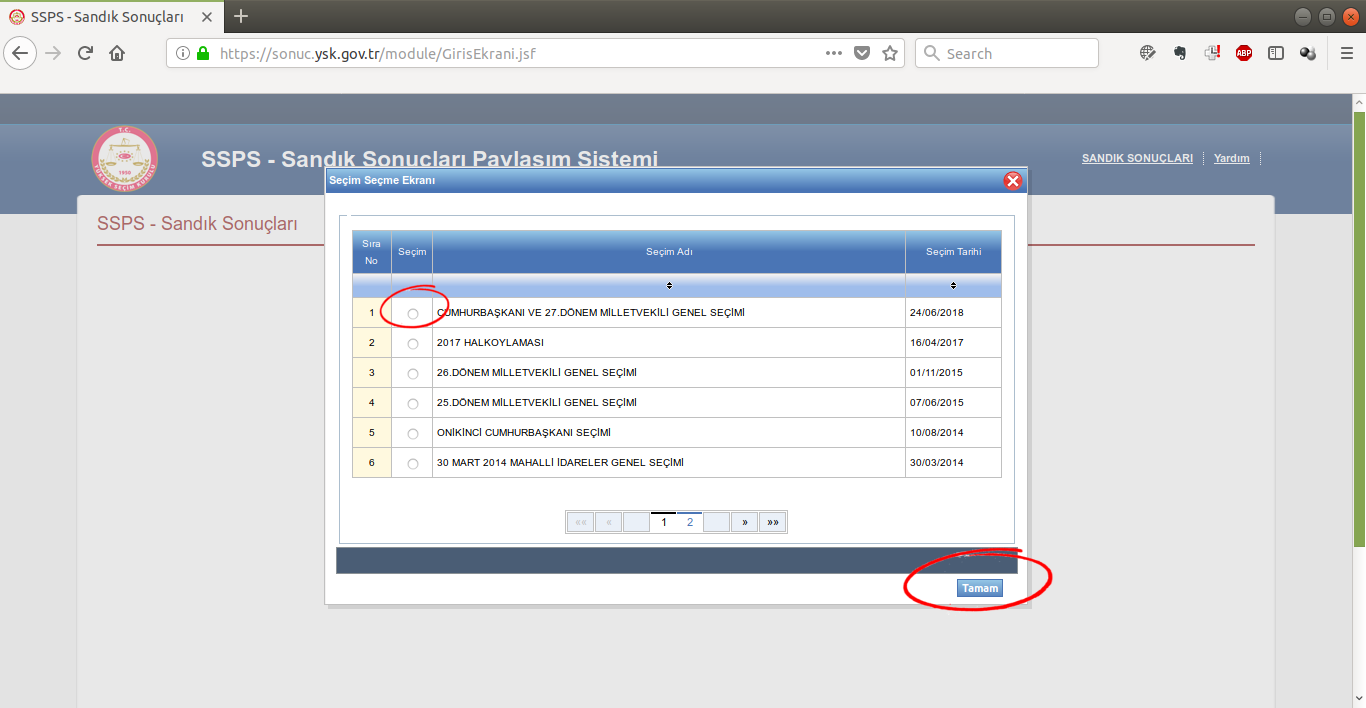

In [3]:
Image("img/ysk1.png")

3 - Milletvekili seçimi sorgu sayfası açılacak. Eğer cumhurbaşkanı seçimi sonuçlarına gitmek istiyorsak sağ yukarıdaki bağlantıya tıklayabiliriz. Şimdilik MV seçimlerinde kalalım.

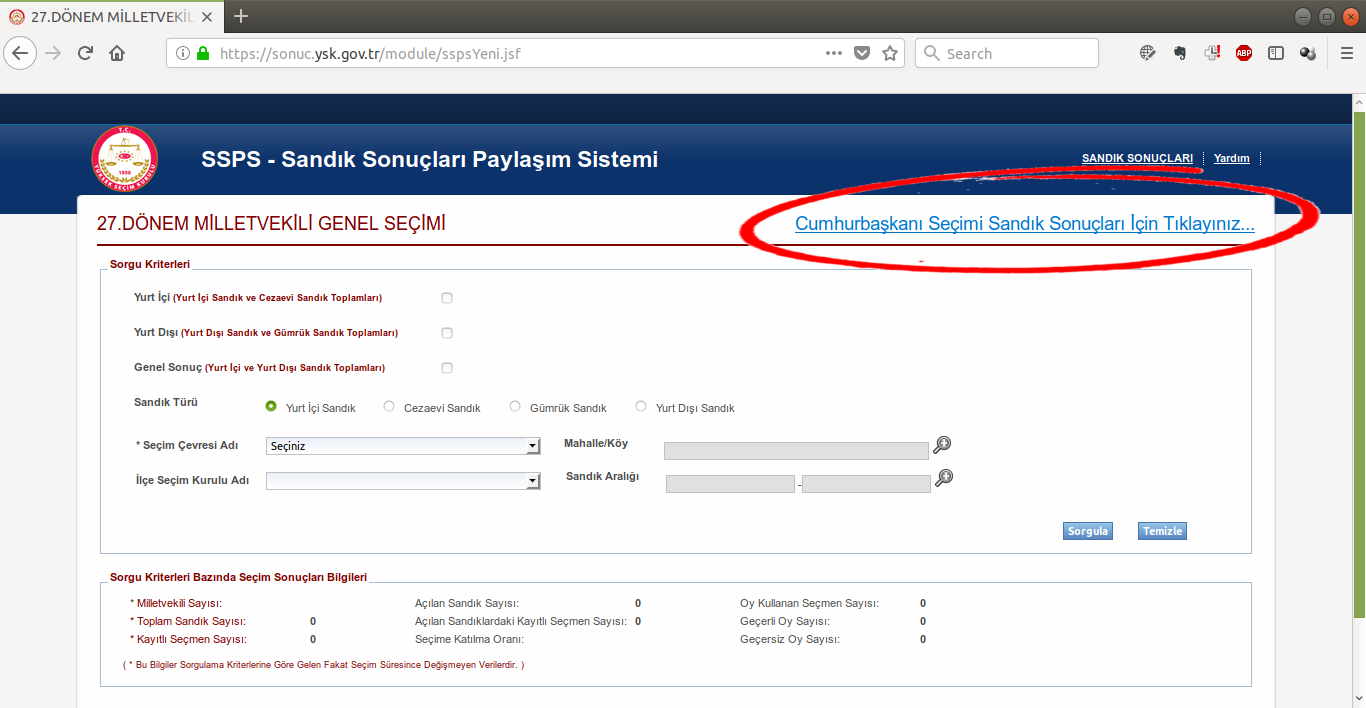

In [4]:
Image("img/ysk2.png")

4 - "Sandık Türü" radyo düğmeleri içinden uygun olanını seçelim. Şimdilik "Yurt İçi Sandık" kalsın.

5 - "Seçim Çevresi Adı" menüsünden "ADANA" seçelim.

6 - "İlçe Seçim Kurulu Adı" menüsü bir önceki seçimimize bağlı olarak değişecek. "ALADAĞ" seçelim.

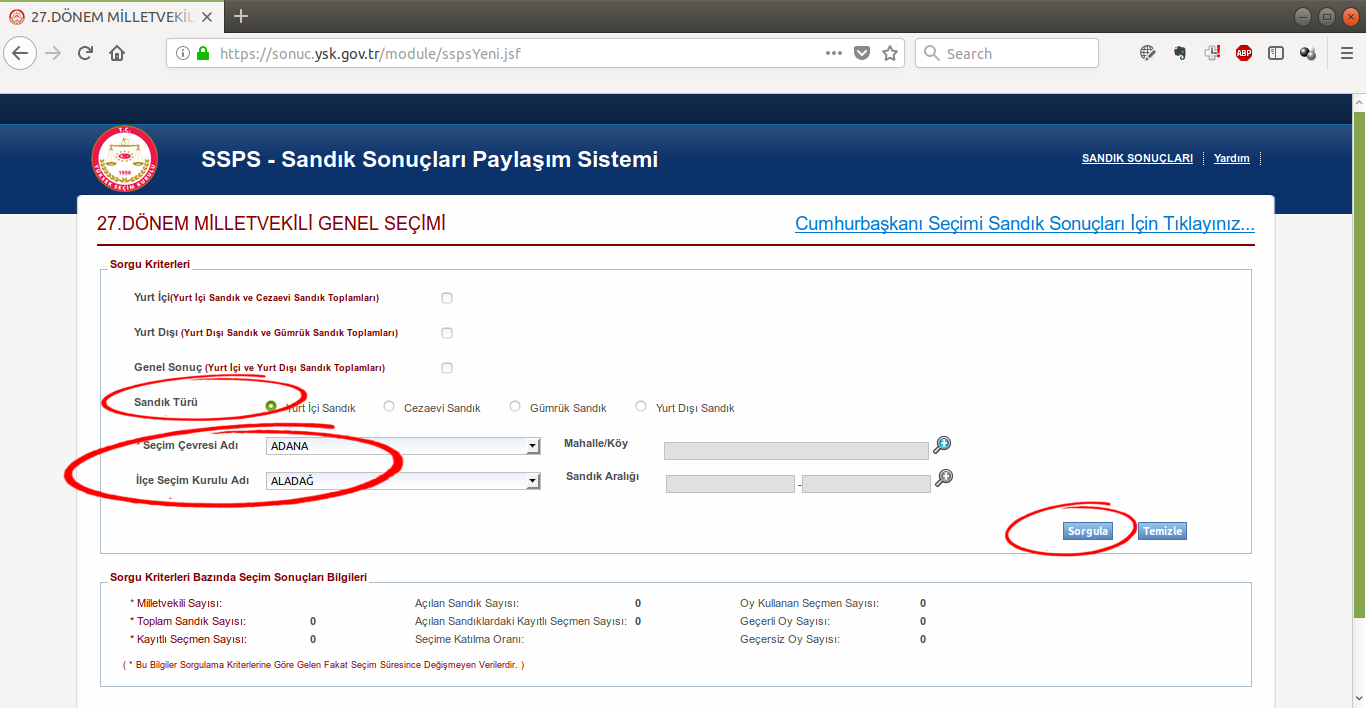

In [5]:
Image("img/ysk4.png")

7 - "Sorgula" düğmesine tıklayalım. Aşağıda, seçilen ilçedeki bütün sandıklara ait verilerin sıralandığı bir tablo çıkacak.

8 - Bu tabloyu bir dosya halinde indirmek için "Tabloyu Kaydet (Excel)" düğmesine tıklayalım.

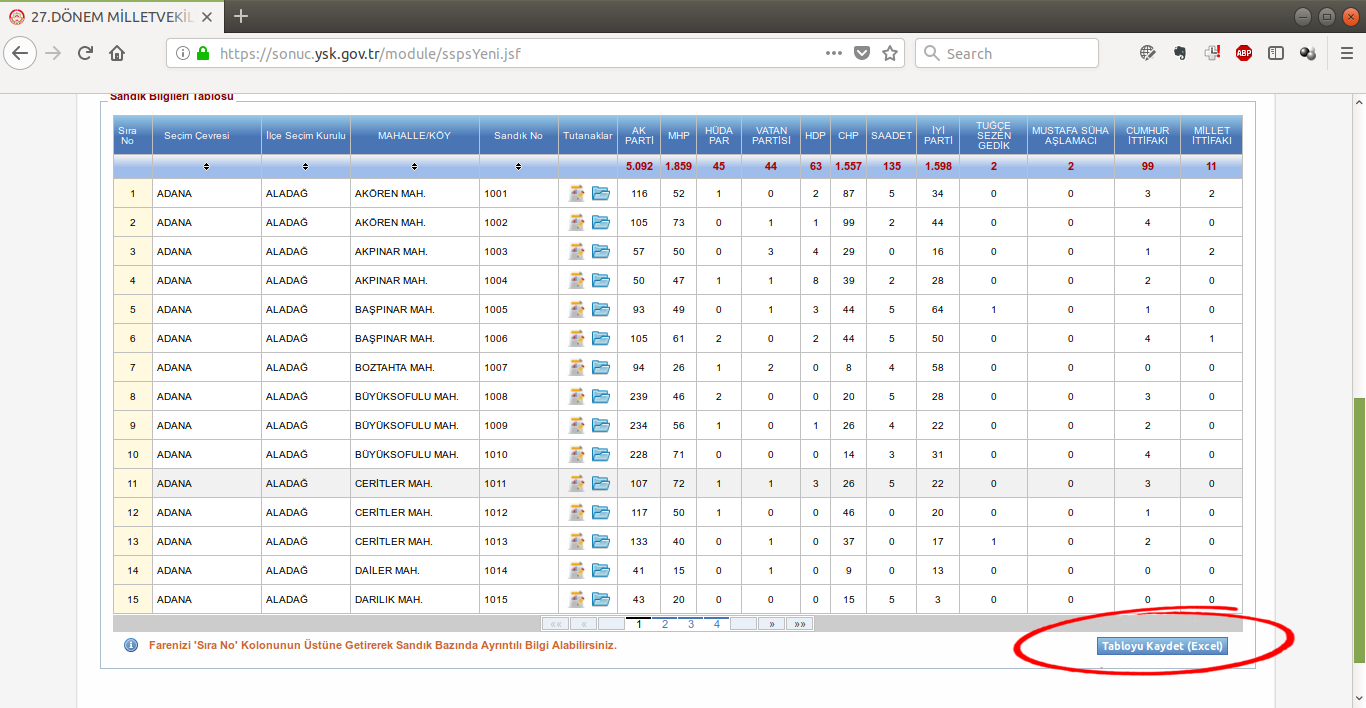

In [5]:
Image("img/ysk5.png")

9 - Bir onay uyarısı çıkacak. "Kabul Ediyorum"a tıklayalım.

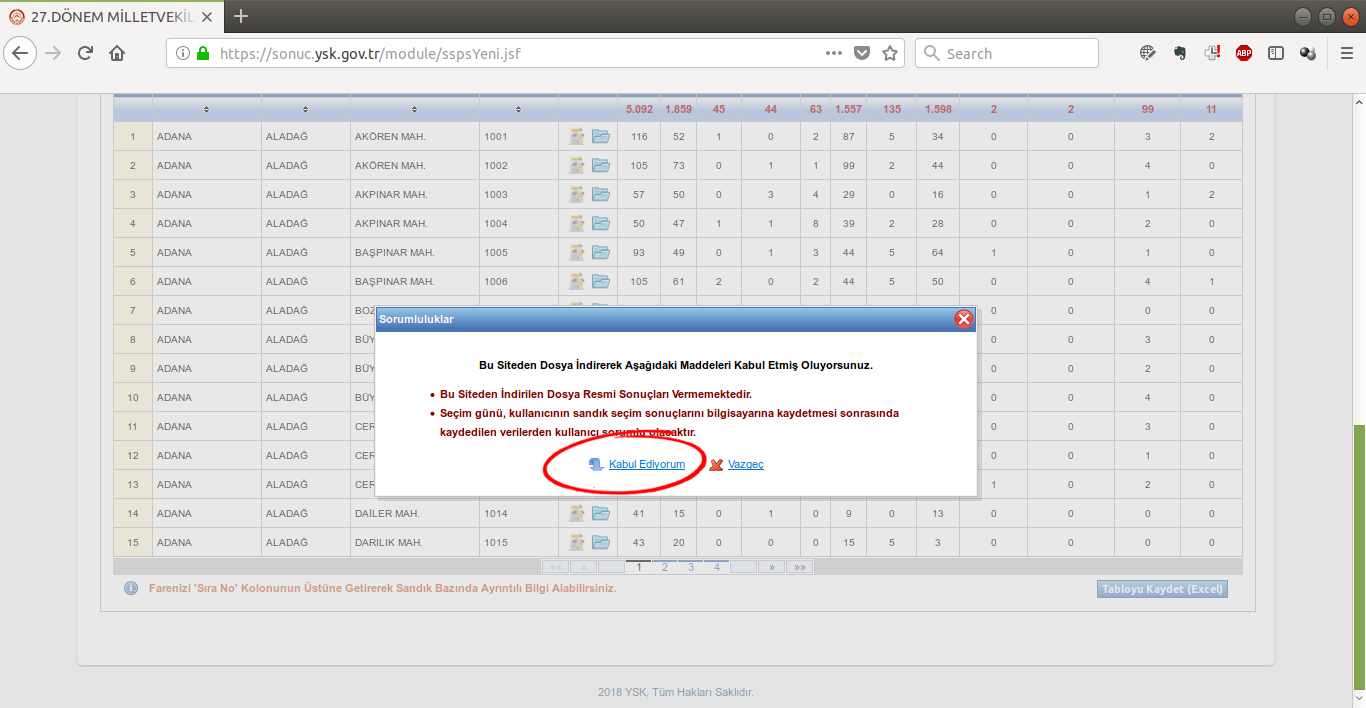

In [6]:
Image("img/ysk6.png")

10 - Çıkan dosya kaydetme diyaloguyla dosyayı kaydedelim.

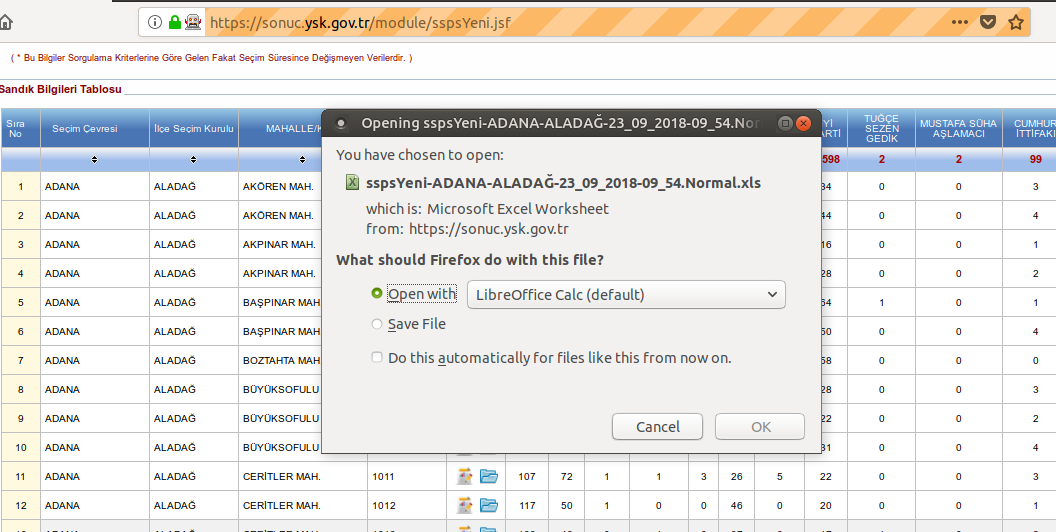

In [7]:
Image("img/ysk11.png")

Bu on adım, sadece bir tek seçim çevresindeki tek bir ilçe kurulu için yapılan işlem. Binden fazla ilçe kurulu var; üstüne cezaevi sandıkları, gümrük kapısı sandıkları, ve yüzlerce dış temsilcilikteki sandıklar var. Aynısını cumhurbaşkanlığı seçimi için de tekrarlamamamız gerekecek. Elle altından kalmak imkansız değil, ama sıkıcı ve zaman alıcı. İşlemi otomatik hale getirmek en doğrusu. 

## Adımları otomatikleştirme

Genel olarak tarayıcı otomatikleştirme işlemi, sayfanın tasarımına ve içindeki elemanlara bağlıdır. İlgili sayfayı açar, ilgilendiğimiz sayfa elemanlarını (bağlantı, düğme, form,...) tespit eder, ve yapılması gereken işlemi (tıklama, bilgi çekme, formu doldurma,...) yaparız.

Elemanları tespit etmek için Selenium birkaç değişik yöntem sunar. Elemanları "id" özellikleriyle, isimleriyle, bağlantı metniyle, XPath ile, veya tagler ve CSS özellikleriyle tespit edebilirsiniz. Sayfanın tasarımına ve elemanın özelliklerine göre bunların bazıları daha elverişli olabilir.

Bu yöntemlerin her biri, açtığınız sayfanın iç tasarımına dair bilgiye ihtiyaç duyar. Elemanların id kodları, isim özellikleri, XPath yapısı, sayfanın tarayıcıda çıkan haline bakarak anlaşılamaz. Bu bilgiler için, tarayıcınızda bulunan web geliştirme araçlarına ihtiyaç duyacaksınız.

Bunun nasıl yapıldığını görmek için yukarıda listelediğimiz adımlardan ilk ikisini basit bir şekilde otomatikleştirelim. Daha sonra daha fazla ayrıntı ekleyeceğiz.

Aşağıdaki komutlar bir Firefox penceresi açar ve ilgili URL'yi yükler.

    from selenium import webdriver
    ffox = webdriver.Firefox()
    ffox.get("https://sonuc.ysk.gov.tr")

Pencereyi kapatmak için `ffox.close()` komutunu verebilirsiniz. Ama şimdilik açık tutalım. 

Şimdi "Seçim Seçme Ekranı"na geldik. Burada 24 Haziran seçimlerine ait radyo düğmesini seçeceğiz. Bunun için, düğmenin üzerine sağ tıklayınca çıkan menüde "Inspect Element (Q)" seçeneğine tıklayarak, elemanın iç özelliklerine erişebiliriz.

Tarayıcımız "DOM and Style Inspector" penceresini açtı. Buradan, o düğmenin "id" özellik değerinin `j_id114:secimSorgulamaForm:j_id117:secimSecmeTable:0:secimId` olduğunu görüyoruz.

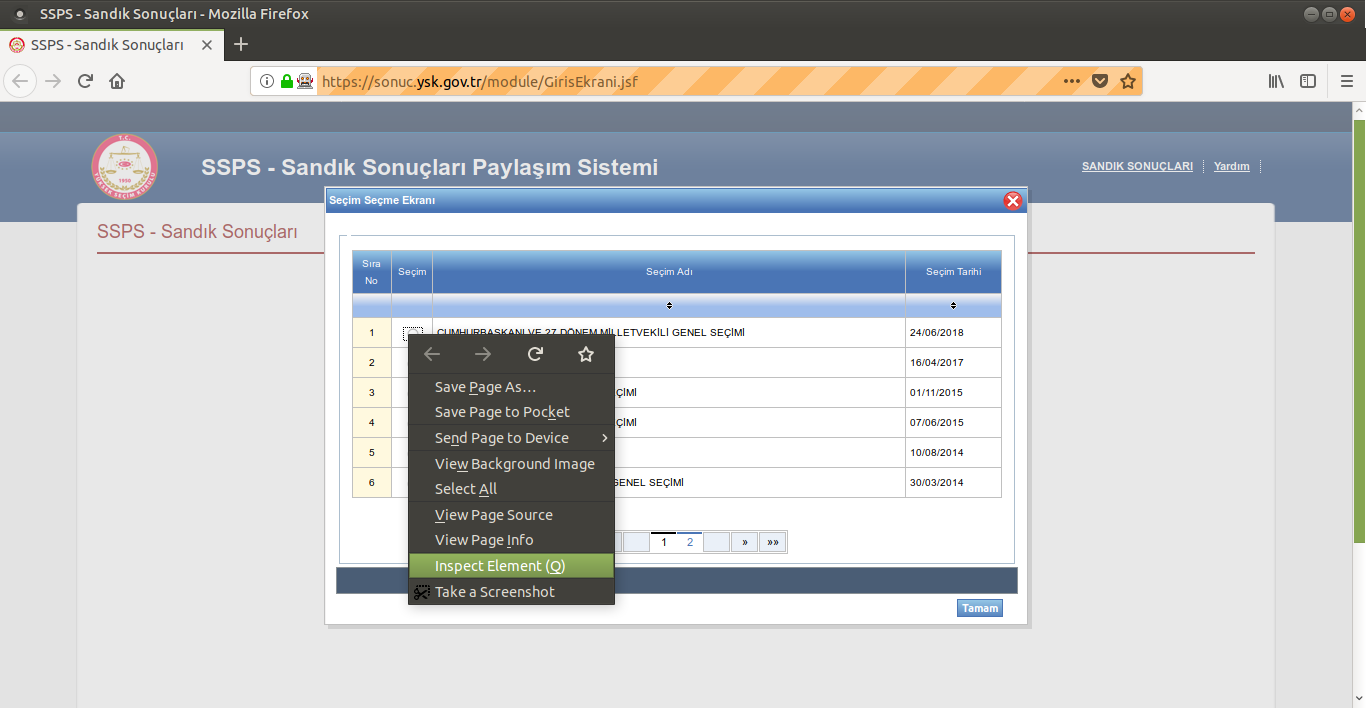

In [8]:
Image("img/ysk7.png")

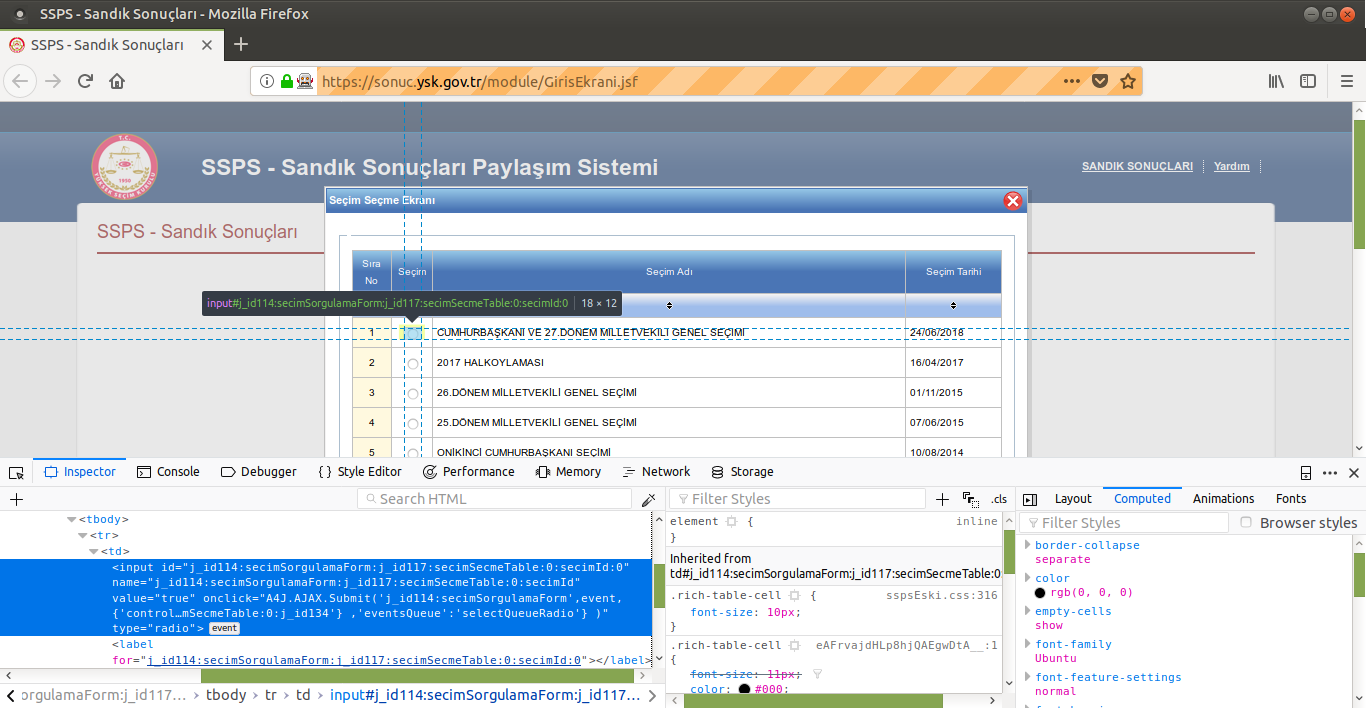

In [9]:
Image("img/ysk8.png")

"id" özelliğini kullanarak radyo düğmesini tespit edelim, ve üzerine tıklayalım.

    secimbutton_id = "j_id114:secimSorgulamaForm:j_id117:secimSecmeTable:0:secimId"
    secimbutton = ffox.find_element_by_id(secimbutton_id)
    secimbutton.click()
    
Şimdi "Tamam" düğmesine basalım. Yine sağ tıklamayla çıkan menüden "Inspect Element" seçerek "DOM and Style Inspector" penceresini açalım. Buradaki bilgiye bakarak "Tamam" düğmesinin "id" özellik değerinin `j_id114:secimSorgulamaForm:j_id144` olduğunu buluyoruz.

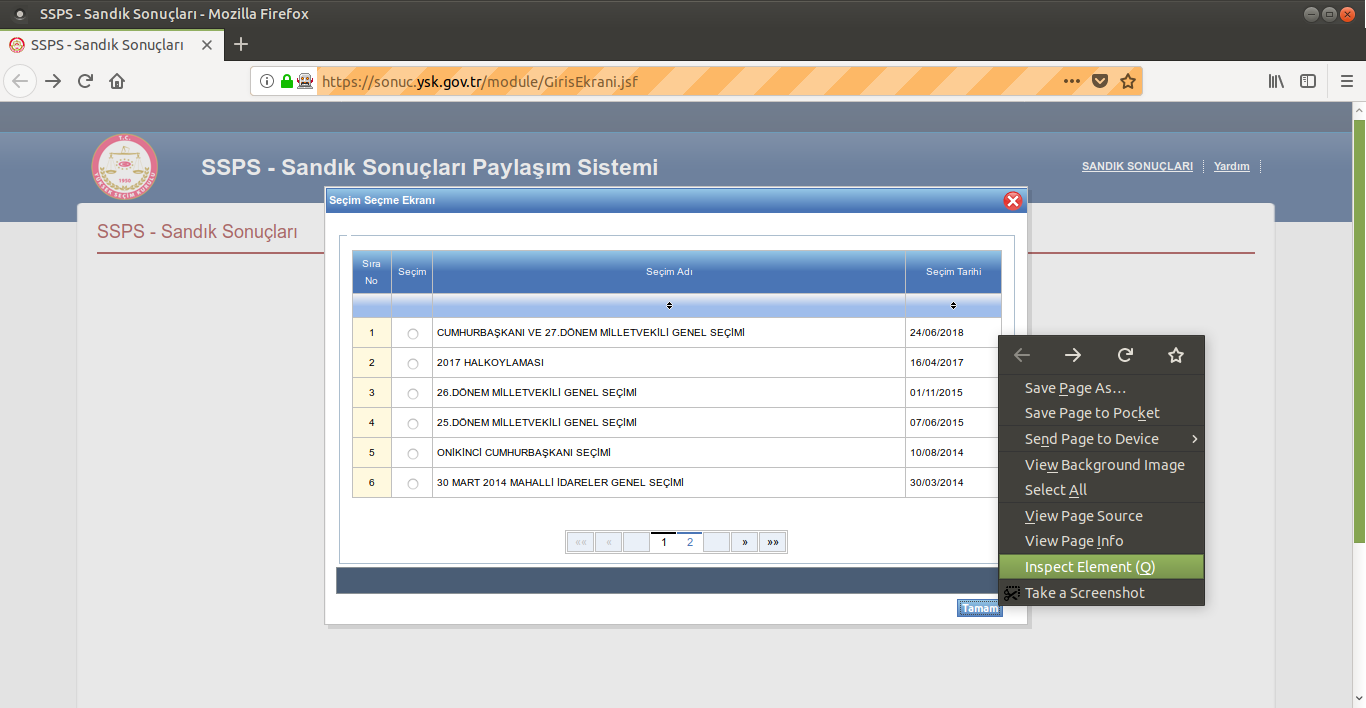

In [10]:
Image("img/ysk9.png")

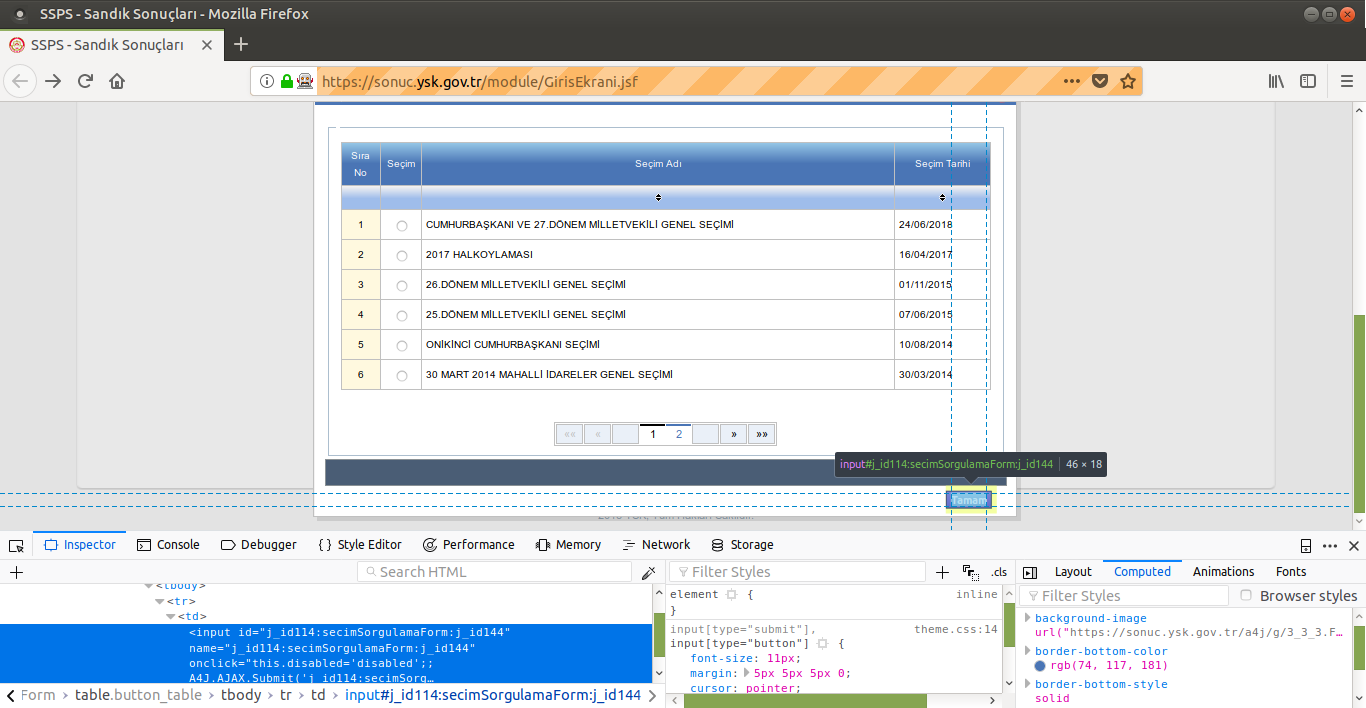

In [11]:
Image("img/ysk10.png")

Bu "id"yi `ffox` nesnesi üzerinden tespit ederek tıklarsak, ilgili seçimin sorgu ekranına gideriz.

    tamambutton_id = "j_id114:secimSorgulamaForm:j_id144"
    tamambutton = ffox.find_element_by_id(tamambutton_id)
    tamambutton.click()

Sonraki adımlara geçmeden önce bir duraklayalım, ve programımıza biraz sabırlı olmayı öğretelim.

## Bekleme
Yukarıdaki komutları bir betik dosyasına yazıp bir seferde çalıştırırsanız yüksek ihtimalle programınız "Böyle bir eleman bulunamadı" mealinde bir hata mesajı vererek sona erecek. Bunun sebebi, tarayıcınızın webden bilgiyi indirip elemanları oluşturmasının nispeten uzun bir zaman alması. Bilgisayarınız sayfaya bağlanmanın hemen ardından seçim radyo düğmesini arıyor; ama o eleman henüz ortaya çıkmış değil. Gerekli elemanların yüklenip sayfaya (DOM'a) eklenmesini beklememiz gerekiyor.

Bu beklemeyi sağlamak için Python'un `time` modülündeki `sleep` fonksiyonunu kullanarak programı sabit bir süre durdurmak akla gelebilir. Ama bu çok iyi bir yöntem değil. Sabit bir bekleme süresi bazı durumlarda lüzumundan fazla, bazen de yetersiz olabilir.

Bunun yerine, Selenium'daki bekleme mekanizmalarını kullanabiliriz. En basit yöntem olarak, web sayfasını açmadan önce

    ffox.implicitly_wait(10)

komutunu verebiliriz. Böylece, tarayıcı nesnemiz belli bir elemanı tespit etmek ister de bulamazsa, hata mesajı vermeden önce 10 saniye boyunca tekrar tekrar bakar.

Bunun yanı sıra Selenium'da  "explicit waits" tabir edilen, daha ayrıntılı bekleme şartları da kullanılabilir. Bir eleman mevcut olana kadar, ekranda görülebilir olana kadar, veya tıklanabilir olana kadar vs. beklemesini söyleyebiliriz. Ancak bu örnekte "implicit wait" işlemi bizim için yeterli.

## Derli toplu bir çalışma masası
Bundan sonraki işlemlerimiz de bir dizi Selenium komutu olacak. Bu işlemleri üst seviye fonksiyonlar altyına toplarsak kodumuz daha düzenli olur. Parçalara bölmek sayesinde işimiz kolaylaşır, ve hataları ayıklamak daha basit olur.

Şimdilik sorgulama sayfasındaki varsayılan ayarları kullanalım: Milletvekili seçimi ve yurtiçi sandık sorgulaması. Belli bir seçim çevresinde ve belli bir ilçe seçim kurulundaki sandık sonuçlarını içeren hesap tablosunu indirmek için aşağıdaki adımları atıyoruz.

1. Tarayıcı penceresini aç.
2. Sorgulama ekranına git.
3. İl seç.
4. İlçe seç.
5. Dosyayı indir.

İlk iki adımı yukarıda yapmıştık. Şimdi bunları birer fonksiyona dönüştürelim. 

    from selenium import webdriver
    from selenium.webdriver.support.select import Select
    from time import sleep

    def başlat():
        ffox = webdriver.Firefox()
        ffox.implicitly_wait(10)
        ffox.get("https://sonuc.ysk.gov.tr")
        return ffox

    def sorgulama_aç(ffox):
        secimbutton_id = "j_id114:secimSorgulamaForm:j_id117:secimSecmeTable:0:secimId"
        secimbutton = ffox.find_element_by_id(secimbutton_id)
        secimbutton.click()

        tamambutton_id = "j_id114:secimSorgulamaForm:j_id144"
        tamambutton = ffox.find_element_by_id(tamambutton_id)
        tamambutton.click()
        
Bu haliyle `sorgulama_aç` fonksiyonu sadece milletvekili seçimlerindeki yurt içi sandıkları sorguluyor. Bunu daha sonra genelleştireceğiz; şimdi bu sade haliyle ilerleyelim. Sonraki işimiz, sorgulama ekranındaki "Seçim Çevresi" menüsünden bir il seçmek. Web sayfasından bu elemanın "id" özellik değerini yukarıda gösterdiğimiz gibi buluruz. Elemanı tespit ettikten sonra Selenium'un `Select` işlemini kullanarak ve belirtilen ili seçeriz.

    def secim_cevresi_seç(ffox, sc):
        id = "j_id49:j_id51:j_id111:cmbSecimCevresi"
        sleep(1)
        secim_cevresi = ffox.find_element_by_id(id)
        Select(secim_cevresi).select_by_visible_text(sc)

Bu fonksiyona `sleep(1)` ile bir saniyelik bir bekleme koyduk. Bu bekleme olmazsa, başta belirlediğimiz "implicit" bekleme komutuna rağmen bir hata çıkabiliyor. Web elemanı hazır olmasına rağmen, başka bir eleman tarafından maskelendiği için tıklanamıyor. Daha ileri bekleme yapıları kullanarak bunun etrafından dolaşmak mümkün; ama bu kodu basit tutmak istediğim için basit bir yama koymayı tercih ettim. Benzer beklemeleri, yine aynı sebeple, aşağıda birkaç kere daha kullanacağız.

Benzer şekilde, ikinci menüden istediğimiz ilçe seçim kurulunu seçecek fonksiyonu yazalım.

    def ilçe_kurulu_seç(ffox, ik):
        id = "j_id49:j_id51:j_id123:cmbIlceSecimKurulu"
        sleep(1)
        ilçe_kurulu = ffox.find_element_by_id(id)
        ilçe_kurulu_select = Select(ilçe_kurulu)
        ilçe_kurulu_select.select_by_visible_text(ik)

Bu fonksiyonların tarayıcı penceresinin durumunu değiştirmekten başka bir iş yapmadıklarını akılda tutalım. Şimdi, belirlediğimiz seçim çevresi ve ilçe kuruluna ait sandık sonuçlarını barındıran dosyayı indirmek için gerekli düğmelere basalım.

    def dosya_indir(ffox):
        sleep(1)
        xpath = "//input[@value='Sorgula']"
        sorgula_button = ffox.find_element_by_xpath(xpath)
        sorgula_button.click()

        sleep(2)
        xpath = "//input[@value='Tabloyu Kaydet (Excel)']"
        kaydet_button = ffox.find_element_by_xpath(xpath)
        kaydet_button.click()

        kabul_link = ffox.find_element_by_link_text("Kabul Ediyorum")
        kabul_link.click()
Burada web elemanlarını id özellikleriyle değil XPath kullanarak tespit ettik.

Yazdığımız bu fonksiyonları doğru sırada çalıştırarak, sözgelişi Adana'nın Aladağ ilçesinin verisini indirebiliriz. Seçim çevresi ve ilçe kurulu değerleri aynen menüde görüldüğü gibi verilmeli.

    ffox = başlat()
    sorgulama_aç(ffox)
    secim_cevresi_seç(ffox, "ADANA")
    ilçe_kurulu_seç(ffox, "ALADAĞ")
    dosya_indir(ffox)

Bu komutlar çalıştırıldığında, bir sorun olmazsa, bağlantılar otomatik olarak tıklanacak, ve karşınıza dosyayı nereye kaydetmek istediğinizi soran bir diyalog çıkacak.
![](ysk11.png)

Bu tabii istenmeyen bir duraklama. Her bir dosya için bir diyalog kutusuyla uğraşacaksanız otomatikleştirmenin çok faydası yok. Tarayıcımızı, dosyaları diyalogsuz kaydetmeye ayarlamalıyız.

## Otomatik dosya kaydetmek

Dosyaları bir diyalogla uğraşmadan belirlenen bir dizine otomatik olarak kaydetmek için, açtığımız tarayıcı penceresinin ayar tercihlerini değiştirecek satırlar ekleyebiliriz. Bunun için `başlat` fonksiyonunu şöyle değiştiririz:

    dizin = "/home/kaan/secim2018/mv"
    def başlat():
        profil = webdriver.FirefoxProfile()
        profil.set_preference("browser.download.folderList", 2)
        profil.set_preference("browser.download.manager.showWhenStarting", False)
        profil.set_preference("browser.download.dir", dizin)
        profil.set_preference("browser.helperApps.neverAsk.saveToDisk", "application/vnd.ms-excel")
        
        ffox = webdriver.Firefox(firefox_profile=profil)
        ffox.implicitly_wait(10)
        ffox.get("https://sonuc.ysk.gov.tr")
        return ffox

Eklediğimiz ayarlar yeni bir Firefox profili yaratıyor. Bu profildeki ayarlarla açılan tarayıcı, Excel dosyalarını hiç bir diyalog kutusu çıkarmadan otomatik olarak `dizin` değişkeninde belirtilen dizine kaydediyor. Bu ayarlar sadece bu programda açtığınız tarayıcı için geçerlidir; normalde kullandığınız tarayıcınızın ayarlarını etkilemez.

## Seçim tipi ve sandık türü ayarı

Buraya kadar olan kodumuzda sandık tipini ve seçim türünü (milletvekili veya cumhurbaşkanı) değiştirmedik. Bu seçenekleri de koda bir dizi if-else ile ekleyebiliriz.

Dört sandık türü var: Yurt içi, cezaevi, gümrük, ve yurt dışı. Bunlar bir radyo düğmesine tıklayarak belirleniyor. Bu düğmelerin id değerlerini daha önceki gibi tarayıcımızın "Inspect" özelliğiyle belirleyip Selenium ile seçerek tıklayacağız.

Dikkat edilmesi gereken bir nokta, cumhurbaşkanlığı ve milletvekili seçim sayfalarındaki elemanların id değerlerinin farklı oluşu. İki seçim türü için ayrı idler kaydetmeliyiz.

Programımızın başında `seçim` ve `sandıktürü` isimli iki değişken kullanarak sorgulama sayfasının ayarlarını yapacağız. Yukarıdaki fonksiyonlara seçim ve sandık türüne göre ilgili id değerini belirleyen birkaç satır ekleyelim.

Fonksiyonlarda küçük bir değişiklik yaparak, yeni bir parametre olarak isttediğimiz değerleri içeren bir sözlük almasını sağlayacağız. Global değişkenlerden kurtulmak programımımızın daha esnek olmasını sağlar.

Buna göre, programımızın yeni hali şöyle:

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from time import sleep

def başlat(params):
    # Parametre değerlerinin doğru olduğundan emin olalım.
    assert(params["seçim"] in ["mv","cb"])
    assert(params["sandık türü"] in ["yurtiçi","cezaevi","gümrük","yurtdışı"])
    
    # Dosyayı otomatik kaydetmek için profil ayarları
    profil = webdriver.FirefoxProfile()
    profil.set_preference("browser.download.folderList", 2)
    profil.set_preference("browser.download.manager.showWhenStarting", False)
    profil.set_preference("browser.download.dir", params["dizin"])
    profil.set_preference("browser.helperApps.neverAsk.saveToDisk", "application/vnd.ms-excel")
    
    # Firefox penceresi aç ve başlangıç sayfasına git.
    # Başka tarayıcılar kullanmak için Selenium belgelerine bakın.
    ffox = webdriver.Firefox(firefox_profile=profil)
    ffox.implicitly_wait(10)
    ffox.get("https://sonuc.ysk.gov.tr")
    return ffox

def sorgulama_aç(ffox, params):
    """Açılış sayfasında uygun seçimler yaparak ilgili sandık sorgulama sayfasını açar.
    Parametrelerde belirtilen seçim türü ve sandık türünü seçer."""
    
    seçim = params["seçim"]
    sandıktürü = params["sandık türü"]
    
    # 2018 seçimlerinin radyo düğmesine tıkla.
    secimbutton_id = "j_id114:secimSorgulamaForm:j_id117:secimSecmeTable:0:secimId"
    secimbutton = ffox.find_element_by_id(secimbutton_id)
    secimbutton.click()
    sleep(1)

    # "Tamam" düğmesine tıkla
    tamambutton_id = "j_id114:secimSorgulamaForm:j_id144"
    tamambutton = ffox.find_element_by_id(tamambutton_id)
    tamambutton.click()
    
    # Sandık sonuçları sorgulaması sayfası açılmış olmalı.
    # Gerekiyorsa CB seçimleri sorgulamasının linkine tıkla.
    if seçim == "cb":
        cblink = ffox.find_element_by_link_text("Cumhurbaşkanı Seçimi Sandık Sonuçları İçin Tıklayınız...")
        cblink.click()
        # Bu tıklama yeni bir pencere açar. Yeni pencereye geç, eskisini kapat.
        yeni_pencere = ffox.window_handles[1]
        ffox.close() # önceki pencereyi kapat
        ffox.switch_to_window(yeni_pencere)
    
    # "Sandık Türü" için uygun radyo düğmesinin ID değerini belirle.
    # Dikkat: MV seçimleri ve CB seçimleri için değerler farklı.
    if seçim == "mv":
        if sandıktürü == "yurtiçi":
            id="j_id49:j_id51:j_id96:sandikTuruRadio:0"
        if sandıktürü == "cezaevi":
            id="j_id49:j_id51:j_id96:sandikTuruRadio:1"
        if sandıktürü == "gümrük":
            id="j_id49:j_id51:j_id96:sandikTuruRadio:2"
        if sandıktürü == "yurtdışı":
            id="j_id49:j_id51:j_id96:sandikTuruRadio:3"
    if seçim == "cb":
        if sandıktürü == "yurtiçi":
            id="j_id50:j_id52:j_id97:sandikTuruRadio:0"
        if sandıktürü == "cezaevi":
            id="j_id50:j_id52:j_id97:sandikTuruRadio:1"
        if sandıktürü == "gümrük":
            id="j_id50:j_id52:j_id97:sandikTuruRadio:2"
        if sandıktürü == "yurtdışı":
            id="j_id50:j_id52:j_id97:sandikTuruRadio:3"
            
    sandik_türü_select = ffox.find_element_by_id(id)
    sandik_türü_select.click()

def secim_cevresi_seç(ffox, params, sc):
    seçim = params["seçim"]
    sandıktürü = params["sandık türü"]
    # Seçim çevresi, gümrük kapısı veya ülke seçimi yapan menünün id değeri
    if seçim == "mv":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id49:j_id51:j_id111:cmbSecimCevresi"
        if sandıktürü == "yurtdışı":
            id = "j_id49:j_id51:j_id148:cmbUlkeAdi"
        if sandıktürü == "gümrük":
            id = "j_id49:j_id51:j_id136:cmbGumruk"
    if seçim == "cb":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id50:j_id52:j_id111:cmbSecimCevresi"
        if sandıktürü == "yurtdışı":
            id = "j_id50:j_id52:j_id148:cmbUlkeAdi"
        if sandıktürü == "gümrük":
            id = "j_id50:j_id52:j_id136:cmbGumruk"
    sleep(1)
    secim_cevresi = ffox.find_element_by_id(id)
    Select(secim_cevresi).select_by_visible_text(sc)

def ilçe_kurulu_seç(ffox, params, ilçe):
    seçim = params["seçim"]
    sandıktürü = params["sandık türü"]
    # Seçim çevresinin alt bölümlerinin menüsünün id değeri.
    # Dikkat: Gümrük kapısının alt bölümü yoktur.
    if sandıktürü == "gümrük":
        return
    if seçim == "mv":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id49:j_id51:j_id123:cmbIlceSecimKurulu"
        if sandıktürü == "yurtdışı":
            id = "j_id49:j_id51:j_id160:cmbDisTem"

    if seçim == "cb":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id50:j_id52:j_id123:cmbIlceSecimKurulu"
        if sandıktürü == "yurtdışı":
            id = "j_id50:j_id52:j_id160:cmbDisTem"

    sleep(1)
    ilçe_kurulu = ffox.find_element_by_id(id)
    ilçe_kurulu_select = Select(ilçe_kurulu)
    ilçe_kurulu_select.select_by_visible_text(ilçe)

def dosya_indir(ffox):
    sleep(1)
    # "Sorgula" düğmesi tıklanabilir olana kadar bekle
    xpath = "//input[@value='Sorgula']"
    sorgula_button = ffox.find_element_by_xpath(xpath)
    sorgula_button.click()
    
    sleep(2)
    # "Tabloyu Kaydet (Excel)" düğmesinin id kodu
    xpath = "//input[@value='Tabloyu Kaydet (Excel)']"
    kaydet_button = ffox.find_element_by_xpath(xpath)
    kaydet_button.click()
    
    kabul_link = ffox.find_element_by_link_text("Kabul Ediyorum")
    kabul_link.click()
    # Dosya kaydı için biraz zaman ver
    sleep(3)
        
if __name__ == "__main__":
    parametreler = {
            "seçim" : "cb",
            "sandık türü" : "yurtdışı",
            "dizin" : "/home/kaan/secim2018/cb"}
    
    ffox = başlat(parametreler)
    sorgulama_aç(ffox, parametreler)
    secim_cevresi_seç(ffox, parametreler, "AMERİKA BİRLEŞİK DEVLETLERİ")
    ilçe_kurulu_seç(ffox, parametreler, "Houston Başkonsolosluğu")
    dosya_indir(ffox)

    ffox.close()

## Sırayla il ve ilçeleri taramak

Yukarıdaki programda seçim çevresi ve ilçe kurulu bilgilerini verdiğimizde ilgili dosyayı otomatik olarak indiriyoruz. Ama biz bütün seçim çevreleri ve bütün ilçe kurulları için işlemi tekrarlamak istiyoruz. 

Önce, bütün seçim çevreleri üzerinden bir döngü kuracağız. Döngünün her adımında, elimizdeki seçim çevresine ait ilçe seçim kurulları üzerinden ikinci bir döngü oluşturacağız.

Seçim çevresi menüsündeki bütün seçenekleri bir listeyle elde etmek için `Select` nesnesinin `options` özelliğini kullanabiliriz. Menünün "id" özelliği verilmişse

    secim_cevresi = ffox.find_element_by_id(id)
    opts = Select(secim_cevresi).options
    secim_cevresi_liste = [opt.text for opt in opts][1:]

komutlarıyla seçim çevresi isimlerini bir liste halinde elde ederiz. Aynısını ilçe seçim kurulu menüsü için de yapabiliriz. Birinci liste elemanı "Seçiniz" olduğu için dışarıda bıraktık.

Bir önceki bölümde yazdığımız fonksiyonlara ek olarak, seçim çevresi listesi ve ilçe seçim kurulu listesini veren iki fonksiyon yazalım. Gümrük sandıklarında ilçe kurulu listesinin bulunmadığını da hesaba katalım.

In [ ]:
def seçim_çevresi_listesi(ffox, params):
    seçim = params["seçim"]
    sandıktürü = params["sandık türü"]
    if seçim == "mv":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id49:j_id51:j_id111:cmbSecimCevresi"
        if sandıktürü == "yurtdışı":
            id = "j_id49:j_id51:j_id148:cmbUlkeAdi"
        if sandıktürü == "gümrük":
            id = "j_id49:j_id51:j_id136:cmbGumruk"
    if seçim == "cb":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id50:j_id52:j_id111:cmbSecimCevresi"
        if sandıktürü == "yurtdışı":
            id = "j_id50:j_id52:j_id148:cmbUlkeAdi"
        if sandıktürü == "gümrük":
            id = "j_id50:j_id52:j_id136:cmbGumruk"

    sleep(1)
    secim_cevresi_select = Select(ffox.find_element_by_id(id))
    secim_cevresi_liste = [opt.text for opt in secim_cevresi_select.options][1:]
    return secim_cevresi_liste

def ilçe_kurulu_listesi(ffox, params):
    seçim = params["seçim"]
    sandıktürü = params["sandık türü"]
    if sandıktürü == "gümrük":
        return []
    if seçim == "mv":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id49:j_id51:j_id123:cmbIlceSecimKurulu"
        if sandıktürü == "yurtdışı":
            id = "j_id49:j_id51:j_id160:cmbDisTem"

    if seçim == "cb":
        if sandıktürü in ["yurtiçi", "cezaevi"]:
            id = "j_id50:j_id52:j_id123:cmbIlceSecimKurulu"
        if sandıktürü == "yurtdışı":
            id = "j_id50:j_id52:j_id160:cmbDisTem"

    sleep(1)
    ilçe_kurulu_select = Select(ffox.find_element_by_id(id))
    ilçe_liste = [opt.text for opt in ilçe_kurulu_select.options][1:]
    return ilçe_liste

Bundan sonra bu fonksiyonlarla elde edeceğimiz listeleri döngü için kullanabiliriz.

In [ ]:
parametreler = {
        "seçim" : "cb",
        "sandık türü" : "yurtiçi",
        "dizin" : "/home/kaan/secim2018/cb"}

ffox = başlat(parametreler)
sorgulama_aç(ffox, parametreler)
for sc in secim_cevresi_listesi(ffox, parametreler):
    secim_cevresi_seç(ffox, parametreler, sc)
    for ik in ilce_kurulu_listesi(ffox, parametreler):
        ilçe_kurulu_seç(ffox, parametreler, ik)
        dosya_indir(ffox)
ffox.close()

## Kaldığımız yeri hatırlamak
Yukarıdaki kodla, belli bir seçim ve sandık türü için bütün sandık sonuçlarını tarayabilmeyi bekliyoruz. Ancak webden veri çekerken işler çok düzgün ilerlemiyor. Bu tarama sırasında internet bağlantısı yavaşlayabilir ve zaman sınırı aşılabilir, sunucu cevap vermeyebilir, bağlantı kopabilir, birçok hata ortaya çıkabilir. Bu hatadan sonra baştan almayıp, kaldığımız yerden devam edebilmek için, dosyasını en son indirdiğimiz il ve ilçeyi (veya seçim çevresi/ilçe kurulu, veya ülke/temsilcilik) bir kenara yazalım ve her döngüyü bunlardan başlatalım.

Önce, kaldığımız yeri kaydetmek ve tekrar okumak için iki küçük fonksiyon yazalım.

In [ ]:
import pickle
def sondurumyaz(il, ilçe, params):
    dizin = params["dizin"]
    with open(dizin+"/son_il_ilce","wb") as f:
        pickle.dump((il,ilçe), f)
    
def sondurumoku(params):
    dizin = params["dizin"]
    try:
        with open(dizin+"/son_il_ilce","rb") as f:
            son_il, son_ilçe = pickle.load(f)
    except FileNotFoundError:
            son_il, son_ilçe = "",""
    return son_il, son_ilçe

Bu fonksiyonlar "son_il_ilce" isimli bir dosya içine son kalınan il ve ilçe çiftini `pickle` kullanarak kaydederler. Dosya mevcut değilse son il ve ilçe boş dize olur. Boş dize, her iki menü için de listenin en başından başlamak demek olacaktır. 

Dosyayı veri dosyalarıyla aynı dizine yazıyoruz. Böylece, farklı dizinlerde (sözgelişi birisi CB, birisi MV) yarım kalmış işlemler varsa, birbirlerinin son durumlarını ayrı ayrı kaydederiz.

Şimdi, yukarıdaki döngü kodunu öyle bir değiştireceğiz ki, seçim çevresi listesinde ve ilçe kurulu listesinde son kaldığımız yerin indeksini bulup oradan itibaren döngülere devam edeceğiz. Bu şekilde, programımız İstanbul-1/Kadıköy-1 dosyasını kaydettikten sonra bir sebepten durduysa, ikinci defasında yeniden Adana/Aladağ'dan başlamak yerine İstanbul-1/Kadıköy-2 ile başlar. Kolaylık için bu kodu `bütün_sonuçları_al` isimli bir fonksiyonun içine koyalım.

Gümrük sandıklarını ayrı olarak işliyoruz, çünkü gümrük sandığı seçiminin ardından ayrı bir ikinci seçim yapmıyoruz. Kaldığımız gümrük sandığından bir sonrakini alıyoruz.

Diğer sandıklarda seçim çevresi/ülke seçiminde kaldığımız seçenekte, ama bir sonraki ilçe/dış temsilcilik ile devam edeceğiz.

In [ ]:
def bütün_sonuçları_al(ffox, params):
    sandıktürü = params["sandık türü"]
    if sandıktürü == "gümrük":
        # Hangi gümrükte kaldık?
        son_gümrük = sondurumoku()[0]  # Boş string "" en başta olduğumuzu gösterir.
        gümrükliste = seçim_çevresi_listesi(ffox, params)
        baş = gümrükliste.index(son_gümrük)+1 if son_gümrük else 0
        for gümrük in gümrükliste[baş:]:
            seçim_çevresi_seç(ffox, params, gümrük)
            dosya_indir(ffox)
            print(gümrük)
            # Son işlenen gümrüğü kaydet.
            sondurumyaz(gümrük,"")
    else:
        # Hangi seçim çevresinde (il/ülke) ve hangi ilçede (seçim kurulu/elçilik) kaldık?
        son_il, son_ilçe = sondurumoku() # Boş string "" en başta olduğumuzu gösterir.
        scliste = seçim_çevresi_listesi(ffox, params)
        baş = scliste.index(son_il) if son_il != "" else 0
        
        for il in scliste[baş:]:
            seçim_çevresi_seç(ffox, params, il)
            ilçeliste = ilçe_kurulu_listesi(ffox, params)
            ilçe_baş = 0
            if son_ilçe in ilçeliste:
                ilçe_baş = ilçeliste.index(son_ilçe)+1
            
            for ilçe in ilçeliste[ilçe_baş:]:
                ilçe_kurulu_seç(ffox, params, ilçe)
                dosya_indir(ffox)
                print(il, ilçe)
                sondurumyaz(il, ilçe)


Bu fonksiyonla beraber, belli bir seçim türü ve sandık tipi için, bütün veri dosyalarını indirecek ana programımızı şöyle yazabiliriz:

In [ ]:
parametreler = {
        "seçim":"cb",
        "sandık türü": "yurtdışı",
        "dizin":"/home/kaan/secim2018/cb"}
ffox = başlat(parametreler)
sorgulama_aç(ffox, parametreler)
bütün_sonuçları_al(ffox, parametreler)
ffox.close()

## Sonuç

Menülerden arka arkaya seçim yapma gerektiren durumları otomatize etmek için Selenium Webdriver'in sağladığı kolaylıklardan bir örnek gördük. Farklı web sitelerinden veriler çekerek, değişik durumları işlemeye dair antrenman yapabilirsiniz.

Gördüğünüz gibi, tarayıcı otomasyonuyla veri çekmek, kullanılan sayfanın ayrıntılarını bilmeyi gerektiriyor. Yeni başlarken epeyce deneme-yanılma yapmaya hazır olun. Ayrıca, sayfa tasarımının deişmesi durumunda bu programı yeni tasarıma göre baştan yapmanız gerekebileceğini unutmayın.

Bu programın bütün olarak kaynak kodunu GitHub depomuzda [LINK GELECEK] bulabilirsiniz. Daha önceki seçimlere ait sandık bilgilerini çekmek için kullanmak isterseniz, önce sayfadaki web elemanlarının id vb. özelliklerine göre kaynak kodunu değiştirmeniz gerektiğini unutmayın.

Bu programla sandık bilgilerini çektikten sonra elimizde bir çok Excel dosyası olacak. Bunları alıp işlemek, tek bir veri tabanı haline getirmek, analiz etmek, özet bilgiler çıkarmak, görselleştirmek başka bir zamanın konusu.

İyi hesaplamalar!